In [1]:
import os, sys, re, json, glob, datetime
from collections import Counter
import seaborn as sns
from nltk.corpus import stopwords


In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
#Websites that have the largest count of news articles
import pandas as pd
# Load data
data = pd.read_csv("../assets/rating.csv")

article_counts = data['source_name'].value_counts()

print("Top 10 Websites with Largest Count of News Articles:")
print(article_counts.head(10))


Top 10 Websites with Largest Count of News Articles:
source_name
ETF Daily News        16746
The Times of India     7504
GlobeNewswire          5423
Globalsecurity.org     3119
Forbes                 2784
BBC News               2113
ABC News               2058
Business Insider       2034
The Punch              1800
Al Jazeera English     1664
Name: count, dtype: int64


In [4]:
#Websites with the highest numbers of visitors data
traffic_data = pd.read_csv("../assets/traffic.csv")

traffic_sum = traffic_data.groupby('Domain')['GlobalRank'].sum()

top_10_traffic = traffic_sum.nlargest(10)
print("Top 10 Websites with Highest Visitor Traffic:")
print(top_10_traffic)


Top 10 Websites with Highest Visitor Traffic:
Domain
toyotamusicfactory.com    1000000
soderhomes.com             999999
pinkwater.com              999998
mt-lock.com                999997
kireie.com                 999996
keith-baker.com            999995
irishcycle.com             999994
hmag.com                   999993
exploring-africa.com       999992
eiretrip.com               999991
Name: GlobalRank, dtype: int64


In [5]:
# Countries with the highest number of news media organisations (represented by domains in the data)
domains_location = pd.read_csv("../assets/domains_location.csv")

# Count unique countries
country_counts = domains_location['Country'].value_counts()

# Top 10 countries with the highest number of news media organizations
top_10_countries = country_counts.head(10)
print("Top 10 Countries with Highest Number of News Media Organizations:")
print(top_10_countries)


Top 10 Countries with Highest Number of News Media Organizations:
Country
United States     14111
United Kingdom     1950
Italy              1810
France             1041
Russia             1024
Canada              887
Germany             884
China               780
Turkey              725
India               686
Name: count, dtype: int64


In [6]:
data.rename(columns={'category': 'country'}, inplace=True)

In [7]:
print(list(domains_location.columns),'\n')
print(list(data.columns),'\n')
print(list(traffic_data.columns))
x = data['country']
print(x)

['SourceCommonName', 'location', 'Country'] 

['article_id', 'source_id', 'source_name', 'author', 'title', 'description', 'url', 'url_to_image', 'published_at', 'content', 'country', 'article', 'title_sentiment'] 

['GlobalRank', 'TldRank', 'Domain', 'TLD', 'RefSubNets', 'RefIPs', 'IDN_Domain', 'IDN_TLD', 'PrevGlobalRank', 'PrevTldRank', 'PrevRefSubNets', 'PrevRefIPs']
0            Monaco
1            Monaco
2        Madagascar
3        Madagascar
4        Madagascar
            ...    
58351          Home
58352          Home
58353          Home
58354          Home
58355          Home
Name: country, Length: 58356, dtype: object


In [8]:
#Countries that have many articles written about them - the content of the news is about that country
country_counts = data['country'].value_counts()


print(country_counts.head(10))


country
Stock          3687
Canada         2066
Health         2046
Real estate    2030
Technology     1993
Finance        1850
News           1401
COVID          1345
Education      1325
Food           1144
Name: count, dtype: int64


In [9]:
print(list(data.columns),'\n')
x = domains_location['SourceCommonName']
print(x.head())

['article_id', 'source_id', 'source_name', 'author', 'title', 'description', 'url', 'url_to_image', 'published_at', 'content', 'country', 'article', 'title_sentiment'] 

0      00221.info
1       01net.com
2        01net.it
3     0223.com.ar
4    022china.com
Name: SourceCommonName, dtype: object


In [19]:
# Define lists of countries for each region
african_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 
                     'Central African Republic (CAR)', 'Chad', 'Comoros', 'Democratic Republic of the Congo (DRC)', 
                     'Republic of the Congo', 'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 
                     'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast (Côte d\'Ivoire)', 
                     'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 
                     'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 
                     'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 
                     'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 
                'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 
                'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 
                'Spain', 'Sweden', 'Monaco']

asia_countries = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 
                  'China', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 
                  'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 
                  'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 
                  'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 
                  'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']

middle_east_countries = ['Bahrain', 'Egypt', 'Cyprus', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 
                         'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'Turkey', 'United Arab Emirates', 
                         'Yemen']

latin_america_countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic', 
                            'Ecuador', 'El Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Mexico', 'Nicaragua', 'Panama', 
                            'Paraguay', 'Peru', 'Uruguay', 'Venezuela']

us_countries = ['United States']

china_countries = ['China']

russia_countries = ['Russia']

ukraine_countries = ['Ukraine']

# Map countries to regions and create a new 'region' column
data['region'] = data['country'].apply(lambda x: 
                                   'African' if x in african_countries else 
                                   ('EU' if x in eu_countries else 
                                    ('Asia' if x in asia_countries else 
                                     ('Middle East' if x in middle_east_countries else 
                                      ('Latin America' if x in latin_america_countries else 
                                       ('US' if x in us_countries else 
                                        ('China' if x in china_countries else 
                                         ('Russia' if x in russia_countries else 
                                          ('Ukraine' if x in ukraine_countries else None)))))))))

for region, country in zip(data['region'][:10], data['country'][:10]):
    print(region, country)


EU Monaco
EU Monaco
African Madagascar
African Madagascar
African Madagascar
African Madagascar
African Madagascar
African Madagascar
African Madagascar
African Madagascar


In [11]:
print(data['region'].value_counts())

region_counts = data['region'].value_counts(dropna=False)

# Print the top N articles for each region
N = 10
for region, count in region_counts.items():
    top_articles = data[data['region'] == region].head(N)
    print(f"Top {N} articles for {region}:")
    print(top_articles[['region', 'source_name',]])
    print("\n")
   

region
Asia             5551
EU               2505
African          2448
Latin America    1728
Ukraine           577
US                481
Middle East       290
Name: count, dtype: int64
Top 10 articles for None:
Empty DataFrame
Columns: [region, source_name]
Index: []


Top 10 articles for Asia:
   region         source_name
40   Asia  Al Jazeera English
49   Asia  Al Jazeera English
50   Asia  Al Jazeera English
51   Asia  The Indian Express
52   Asia              Forbes
53   Asia              Forbes
54   Asia              Forbes
55   Asia              Forbes
56   Asia            Phys.Org
57   Asia  The Indian Express


Top 10 articles for EU:
    region         source_name
0       EU              Forbes
1       EU                 CNA
355     EU            ABC News
356     EU  Globalsecurity.org
361     EU  Al Jazeera English
362     EU  Al Jazeera English
363     EU                Time
364     EU            ABC News
365     EU            Deadline
366     EU                  RT


Top

In [12]:
print(data['title_sentiment'])

0         Neutral
1        Positive
2        Negative
3         Neutral
4         Neutral
           ...   
58351     Neutral
58352     Neutral
58353    Negative
58354     Neutral
58355     Neutral
Name: title_sentiment, Length: 58356, dtype: object


In [13]:
# Step 1: Group the data by website domain
grouped_data = data.groupby('source_name')

# Step 2: Calculate the count of positive, neutral, and negative sentiment for each domain
sentiment_counts = grouped_data['title_sentiment'].value_counts().unstack(fill_value=0)

# Step 3: Calculate descriptive statistics for each sentiment category
sentiment_statistics = grouped_data['title_sentiment'].describe()

# Convert sentiment labels to numerical values
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
data['title_sentiment_numeric'] = data['title_sentiment'].map(sentiment_mapping)

# Now calculate the mean and median of the 'title_sentiment_numeric' column
sentiment_statistics = grouped_data['title_sentiment_numeric'].describe()
sentiment_means = grouped_data['title_sentiment_numeric'].mean()
sentiment_medians = grouped_data['title_sentiment_numeric'].median()
# Step 5: Select the top 10 domains by visitors traffic
top_10_domains = data['source_name'].value_counts().head(10).index

# Analyze the distribution of sentiments for the top 10 domains
for domain in top_10_domains:
    domain_data = data[data['source_name'] == domain]['title_sentiment']
    domain_distribution = domain_data.value_counts(normalize=True)
    global_distribution = data['title_sentiment'].value_counts(normalize=True)
    print(f"Domain: {domain}")
    print("Domain Sentiment Distribution:")
    print(domain_distribution)
    print("Global Sentiment Distribution:")
    print(global_distribution)
    print("\n")


Domain: ETF Daily News
Domain Sentiment Distribution:
title_sentiment
Neutral     0.907321
Positive    0.059238
Negative    0.033441
Name: proportion, dtype: float64
Global Sentiment Distribution:
title_sentiment
Neutral     0.735588
Negative    0.156505
Positive    0.107907
Name: proportion, dtype: float64


Domain: The Times of India
Domain Sentiment Distribution:
title_sentiment
Neutral     0.686167
Negative    0.161247
Positive    0.152585
Name: proportion, dtype: float64
Global Sentiment Distribution:
title_sentiment
Neutral     0.735588
Negative    0.156505
Positive    0.107907
Name: proportion, dtype: float64


Domain: GlobeNewswire
Domain Sentiment Distribution:
title_sentiment
Neutral     0.828139
Positive    0.166882
Negative    0.004979
Name: proportion, dtype: float64
Global Sentiment Distribution:
title_sentiment
Neutral     0.735588
Negative    0.156505
Positive    0.107907
Name: proportion, dtype: float64


Domain: Globalsecurity.org
Domain Sentiment Distribution:
title_

In [14]:

# Step 1: Group the data by website domain
grouped_data = data.groupby('source_name')

# Step 2: Calculate the raw message lengths and the number of words in the title for each domain
content_metadata = grouped_data.agg({'description': lambda x: x.str.len().mean(),
                                    'title': lambda x: x.str.split().apply(len).mean()})

# Step 3: Analyze the distributions among sites
raw_message_length_distribution = grouped_data['description'].apply(lambda x: x.describe())
title_word_count_distribution = grouped_data['title'].apply(lambda x: x.str.split().apply(len).describe())

# Print the results
print("Content Metadata Across Sites:")
print(content_metadata)
print("\nRaw Message Length Distribution Among Sites:")
print(raw_message_length_distribution)
print("\nTitle Word Count Distribution Among Sites:")
print(title_word_count_distribution)

Content Metadata Across Sites:
                              description      title
source_name                                         
ABC News                       151.160350  13.480078
Al Jazeera English             107.309495  10.158654
AllAfrica - Top Africa News    165.000000   9.950000
Android Central                132.720307  12.243295
BBC News                        96.761477   9.342168
Boing Boing                    258.994390  12.150070
Business Insider               133.010827  18.022616
CNA                            237.145401  10.954006
CNN                            188.292135  13.235955
Deadline                       259.997854  15.516094
Digital Trends                 138.795918  10.858418
ETF Daily News                 260.000000  10.767945
Euronews                       154.818182  11.678322
Forbes                         138.304598  10.323635
Gizmodo.com                    243.953608  10.461340
Globalsecurity.org             170.648285  12.125361
GlobeNewswire  

In [22]:
print(data['url'].head(30))

0     https://www.forbes.com/sites/elizabethbrownfie...
1     https://www.channelnewsasia.com/sport/nice-cla...
2     https://time.com/6320467/amphibians-most-vulne...
3     https://phys.org/news/2023-10-image-rusty-red-...
4     https://www.digitaltrends.com/movies/everythin...
5     https://www.aljazeera.com/news/2023/10/27/unga...
6      https://www.bbc.co.uk/news/world-africa-67086254
7     https://phys.org/news/2023-10-scans-tropical-f...
8     https://deadline.com/feature/taylor-swift-eras...
9     https://www.euronews.com/2023/10/13/marine-le-...
10    https://phys.org/news/2023-10-tiny-mysterious-...
11    https://www.rt.com/africa/585847-russian-scien...
12    https://phys.org/news/2023-10-animal-traits-jo...
13    https://www.forbes.com/sites/unicefusa/2023/10...
14    https://www.forbes.com/sites/forbesnonprofitco...
15    https://punchng.com/full-list-davido-rema-win-...
16    https://www.aljazeera.com/features/2023/10/4/k...
17    https://www.euronews.com/2023/10/20/red-al

In [16]:
# Extract domain from the URL column in rating dataframe
data['Domain'] = data['url'].str.extract(r'(https?://(?:www\.)?([^/]+))')[1]

# Step 2: Merge the data based on the Domain column
merged_data = pd.merge(data, traffic_data, left_on='Domain', right_on='Domain', how='inner')

# Convert 'title_sentiment' column to numeric
# Handle errors by setting them to NaN
merged_data['title_sentiment'] = pd.to_numeric(merged_data['title_sentiment'], errors='coerce')

# Step 3: Select and group by source_name and title_sentiment
grouped_data = merged_data.groupby('source_name')['title_sentiment'].mean().reset_index()

# Display the grouped data
print(grouped_data)

                     source_name  title_sentiment
0             Al Jazeera English              NaN
1    AllAfrica - Top Africa News              NaN
2                Android Central              NaN
3                       BBC News              NaN
4                    Boing Boing              NaN
5               Business Insider              NaN
6                            CNA              NaN
7                            CNN              NaN
8                       Deadline              NaN
9                 Digital Trends              NaN
10                ETF Daily News              NaN
11                      Euronews              NaN
12                        Forbes              NaN
13                   Gizmodo.com              NaN
14            Globalsecurity.org              NaN
15                 GlobeNewswire              NaN
16  International Business Times              NaN
17            Marketscreener.com              NaN
18                           NPR              NaN


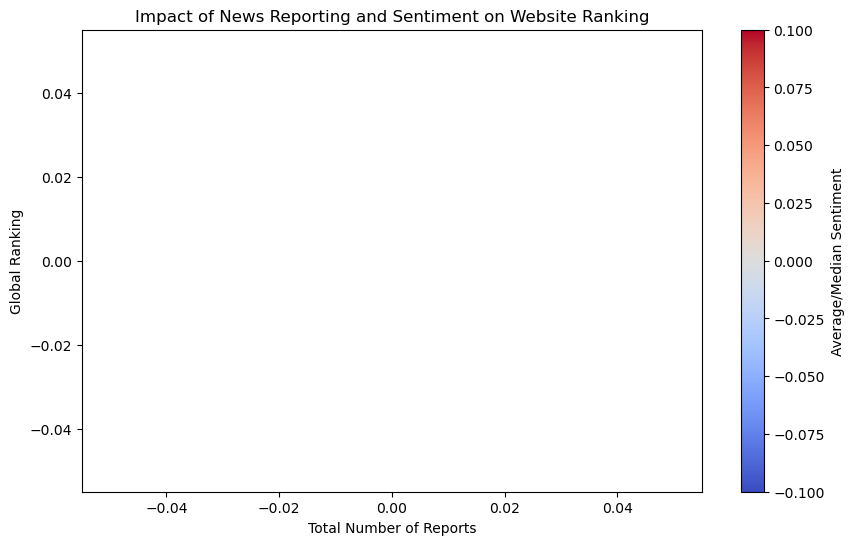

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Calculate the total number of reports by each website
reports_count = merged_data.groupby('source_name').size().reset_index(name='report_count')

# Step 2: Merge the traffic data and the grouped data
merged_data = pd.merge(merged_data, reports_count, on='source_name', how='inner')

# Convert 'title_sentiment' column to numeric
# Handle errors by setting them to NaN
merged_data['title_sentiment'] = pd.to_numeric(merged_data['title_sentiment'], errors='coerce')

# Step 3: Plot a 2D scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['report_count'], merged_data['GlobalRank'], c=merged_data['title_sentiment'], cmap='coolwarm')
plt.xlabel('Total Number of Reports')
plt.ylabel('Global Ranking')
plt.title('Impact of News Reporting and Sentiment on Website Ranking')
plt.colorbar(label='Average/Median Sentiment')
plt.show()
